In [488]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [489]:
# train_df = pd.read_csv("data/train.csv", dtype={'target':'category'})
train_df = pd.read_csv("data/train.csv")

In [490]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**There are a lot of locations missings**

In [491]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [492]:
# Analysing null values
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [493]:
# Lets see the number of (rows, cols)
print(train_df.shape)

(7613, 5)


In [494]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

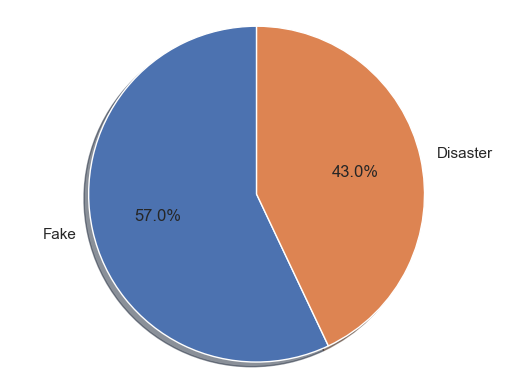

In [495]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Fake', 'Disaster'

fig1, ax1 = plt.subplots()
ax1.pie(train_df['target'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [496]:
# Lets count the number of words and length
train_df['words_count'] = train_df['text'].apply(lambda x: len(x.lower().split()))
train_df['length'] = train_df['text'].apply(lambda x: len(x))
train_df.head()

,id,keyword,location,text,target,words_count,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88


In [497]:
# metricas generales de las columnas o features numericos del data frame que podemos analizar via .describe
train_df.describe(include='all')

,id,keyword,location,text,target,words_count,length
count,"7,613.00",7552,5080,7613,"7,613.00","7,613.00","7,613.00"
unique,nan,221,3341,7503,nan,nan,nan
top,nan,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,nan,nan,nan
freq,nan,45,104,10,nan,nan,nan
mean,"5,441.93",NaN,NaN,NaN,0.43,14.90,101.04
std,"3,137.12",NaN,NaN,NaN,0.50,5.73,33.78
min,1.00,NaN,NaN,NaN,0.00,1.00,7.00
25%,"2,734.00",NaN,NaN,NaN,0.00,11.00,78.00
50%,"5,408.00",NaN,NaN,NaN,0.00,15.00,107.00
75%,"8,146.00",NaN,NaN,NaN,1.00,19.00,133.00


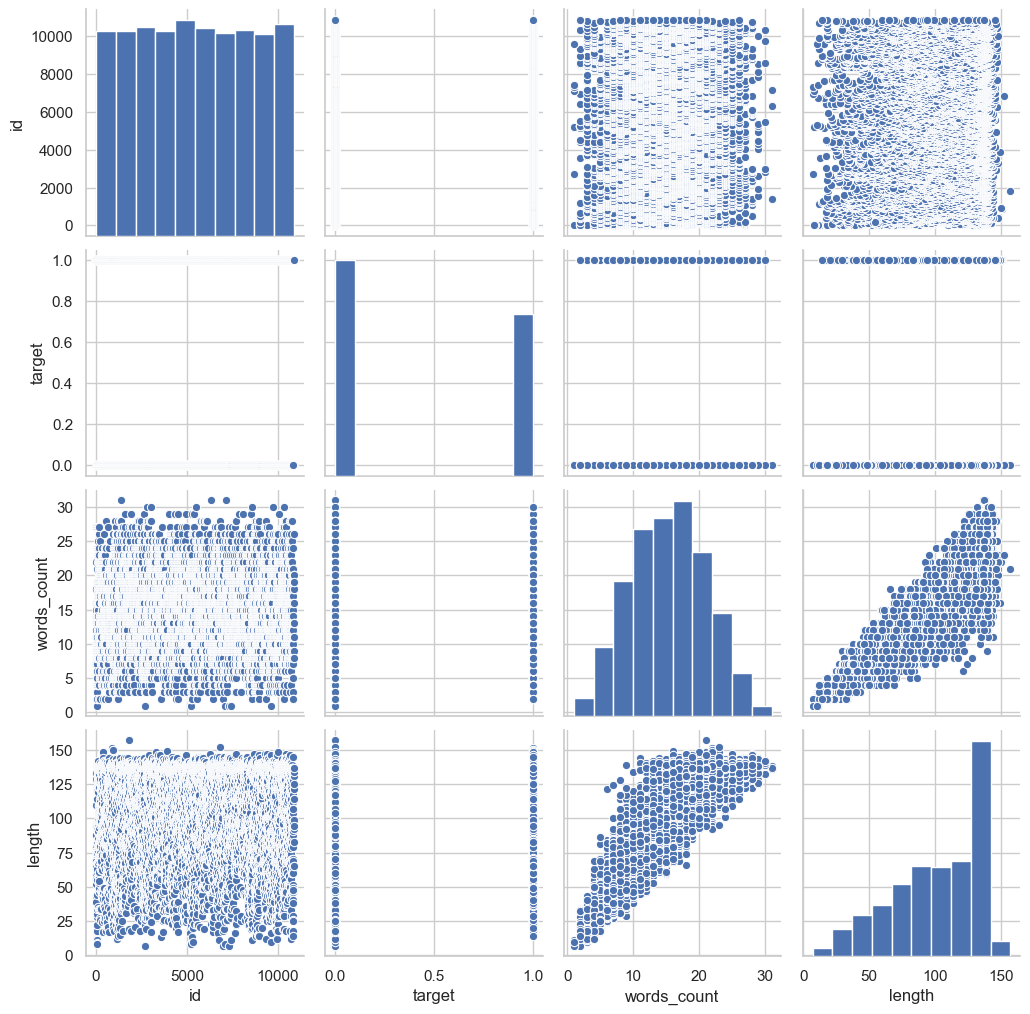

In [498]:
# correlations
sns.pairplot(train_df)

**Lets analyze value counts for words count**

In [499]:
train_df['words_count'].value_counts()

11    497
18    494
17    494
16    451
14    450
13    445
15    425
12    415
20    409
19    390
9     363
10    334
21    296
8     293
22    279
7     242
23    220
24    189
6     186
5     159
25    129
4     115
26     98
3      75
27     60
28     41
2      34
29     13
1       8
30      6
31      3
Name: words_count, dtype: int64

In [500]:
train_df["words_count"].describe()

count               7,613.00
mean                   14.90
std                     5.73
min                     1.00
25%                    11.00
50%                    15.00
75%                    19.00
max                    31.00
Name: words_count, dtype: float64

Text(0, 0.5, 'Densidad')

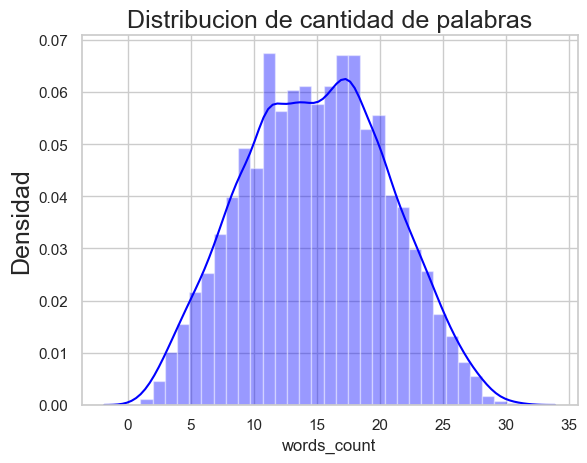

In [501]:
g = sns.distplot(train_df["words_count"], color="blue", label='Word count for tweets', hist=True, bins=31)

g.set_title("Distribucion de cantidad de palabras", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Text(0, 0.5, 'Densidad')

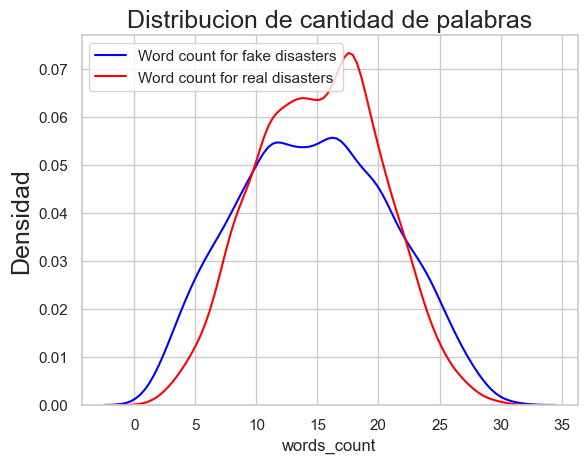

In [502]:
g = sns.distplot(train_df[train_df["target"] == 0]["words_count"], color="blue", label='Word count for fake disasters', hist=False)
g = sns.distplot(train_df[train_df["target"] == 1]["words_count"], color="red", label='Word count for real disasters', hist=False)

g.set_title("Distribucion de cantidad de palabras", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

### Correlation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


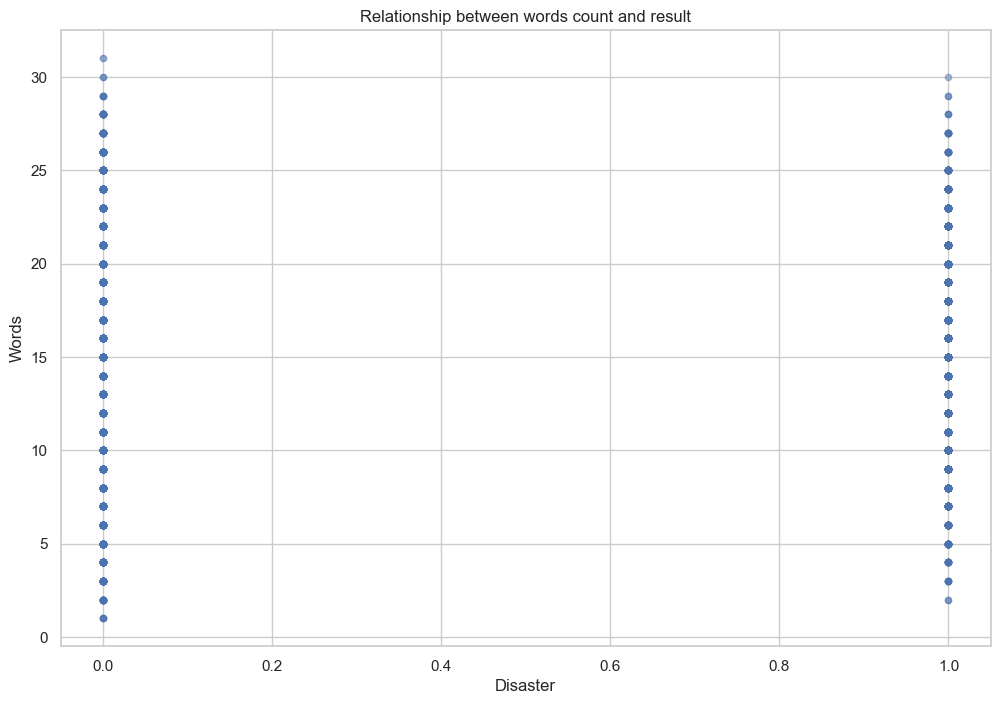

In [503]:
train_df.plot.scatter('target','words_count', title='Relationship between words count and result',alpha=0.25,figsize=(12,8));
ax=plt.gca()
ax.set_ylabel('Words')
ax.set_xlabel('Disaster');

In [504]:
train_df.corr()

,id,target,words_count,length
id,1.00,0.06,0.01,0.02
target,0.06,1.00,0.04,0.18
words_count,0.01,0.04,1.00,0.84
length,0.02,0.18,0.84,1.00


### it doent look like there is a strong correlationship between them, Lets do a similar analysis for tweet length

In [505]:
train_df['length'].value_counts()

136    401
139    275
138    256
140    218
137    210
      ... 
150      2
151      1
152      1
149      1
157      1
Name: length, Length: 147, dtype: int64

In [506]:
train_df["length"].describe()

count               7,613.00
mean                  101.04
std                    33.78
min                     7.00
25%                    78.00
50%                   107.00
75%                   133.00
max                   157.00
Name: length, dtype: float64

Text(0, 0.5, 'Densidad')

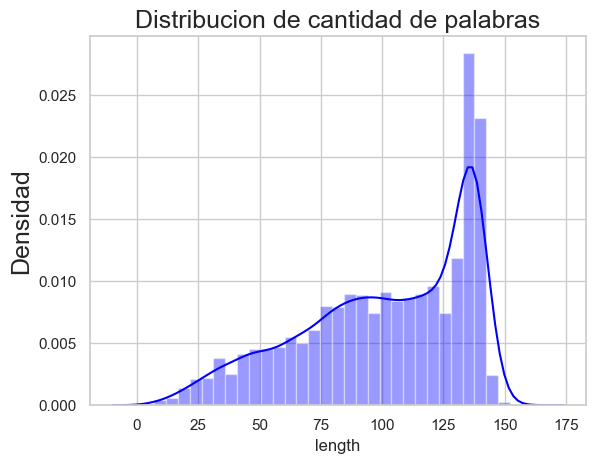

In [507]:
g = sns.distplot(train_df["length"], color="blue", label='Tweet length', hist=True, bins=31)
g.set_title("Distribucion de cantidad de palabras", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Text(0, 0.5, 'Densidad')

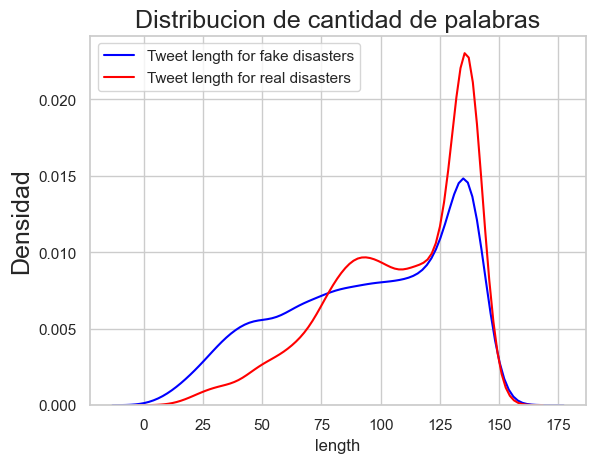

In [508]:
g = sns.distplot(train_df[train_df["target"] == 0]["length"], color="blue", label='Tweet length for fake disasters', hist=False)
g = sns.distplot(train_df[train_df["target"] == 1]["length"], color="red", label='Tweet length for real disasters', hist=False)

g.set_title("Distribucion de cantidad de palabras", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

In [509]:
train_df.loc[(train_df["target"] == 1) & (train_df["length"] < 50)]

,id,keyword,location,text,target,words_count,length
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38
10,16,NaN,NaN,Three people died from the heat wave so far,1,9,43
13,19,NaN,NaN,#Flood in Bago Myanmar #We arrived Bago,1,7,39
73,105,accident,Australia,BigRigRadio Live Accident Awareness,1,4,35
89,131,accident,"Wilmington, NC",;ACCIDENT PROPERTY DAMAGE; PINER RD/HORNDALE DR,1,6,47
...,...,...,...,...,...,...,...
7364,10544,windstorm,"Victoria, BC",*looks outside at the windstorm* niiiice,1,6,40
7469,10686,wreck,NaN,@Captainn_Morgan car wreck ??,1,4,29
7495,10722,wreck,"Greenville, S.C.",Greer man dies in wreck http://t.co/n2qZbMZuly,1,6,46
7572,10823,wrecked,"Manhattan, NY",@Kirafrog @mount_wario Did you get wrecked again?,1,7,49


### It looks like there are not a lot of real tweets shorter than 50 chars


In [510]:
train_df[train_df["target"] == 1]["length"].describe()

count               3,271.00
mean                  108.11
std                    29.31
min                    14.00
25%                    88.00
50%                   115.00
75%                   136.00
max                   151.00
Name: length, dtype: float64

In [511]:
train_df[train_df["target"] == 0]["length"].describe()

count               4,342.00
mean                   95.71
std                    35.89
min                     7.00
25%                    68.00
50%                   101.00
75%                   130.00
max                   157.00
Name: length, dtype: float64

### Lets analyze the keywords

In [512]:
train_df.keyword.describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [513]:
train_df['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [514]:
mean = train_df['keyword'].value_counts().mean()
train_df['keyword'].value_counts().describe()

count                 221.00
mean                   34.17
std                     4.79
min                     9.00
25%                    33.00
50%                    35.00
75%                    37.00
max                    45.00
Name: keyword, dtype: float64

In [516]:
train_df['keyword'].value_counts().mean()

34.171945701357465

### Lets take 35 as a high number of keyword apparence

Text(0.5, 0, 'keywords')

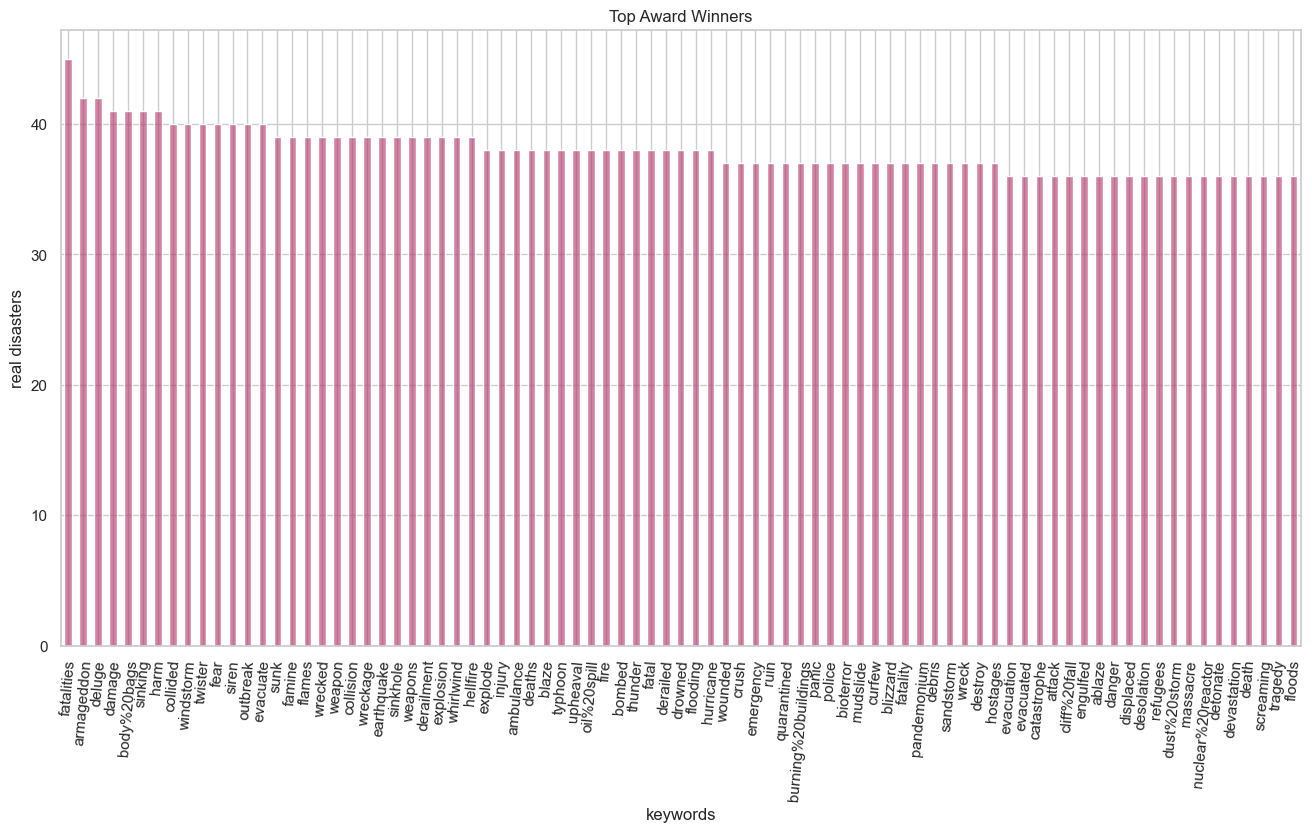

In [517]:
train_df['keyword'].value_counts()[(train_df['keyword'].value_counts() > 35)].plot(kind='bar',figsize=(16,8),rot=85,title='Top Award Winners',color=(0.7, 0.2, 0.4, 0.6));
ax=plt.gca()
ax.set_ylabel('real disasters');
ax.set_xlabel('keywords')


In [518]:
kw_more_than_40 = train_df.groupby("keyword").filter(lambda x: len(x) >= 39)

In [519]:
top_kw = kw_more_than_40.groupby('keyword').agg({'target': ['sum','count', 'mean', 'std']})
level0 = top_kw.columns.get_level_values(0)
level1 = top_kw.columns.get_level_values(1)
top_kw.columns = level0 + '_' + level1
top_kw = top_kw.reset_index()
top_kw['negative_cases'] = top_kw['target_count'] - top_kw['target_sum']
top_kw

,keyword,target_sum,target_count,target_mean,target_std,negative_cases
0,armageddon,5,42,0.12,0.33,37
1,body%20bags,1,41,0.02,0.16,40
2,collided,23,40,0.57,0.50,17
3,collision,29,39,0.74,0.44,10
4,damage,19,41,0.46,0.50,22
5,deluge,6,42,0.14,0.35,36
6,derailment,39,39,1.00,0.00,0
7,earthquake,30,39,0.77,0.43,9
8,evacuate,25,40,0.62,0.49,15
9,explosion,20,39,0.51,0.51,19


In [529]:
top_kw.describe()

,target_sum,target_count,target_mean,target_std,negative_cases
count,28.00,28.00,28.00,28.00,28.00
mean,16.93,39.96,0.43,0.38,23.04
std,11.77,1.37,0.30,0.15,12.11
min,1.00,39.00,0.02,0.00,0.00
25%,5.75,39.00,0.14,0.33,14.50
50%,15.00,39.50,0.38,0.43,24.50
75%,26.00,40.25,0.64,0.49,35.00
max,39.00,45.00,1.00,0.51,40.00


### This only represents 15% of the dataset

In [540]:
top_kw['target_count'].sum()/train_df.describe()['id']['count']

0.1469854196768685

Text(0, 0.5, 'Density')

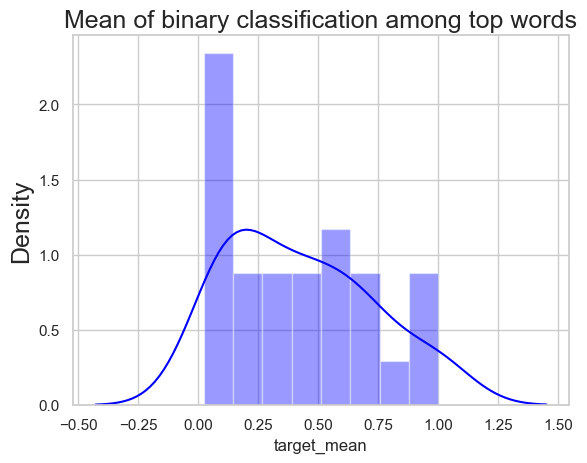

In [541]:
g = sns.distplot(top_kw["target_mean"], color="blue", label='Classification distribution', hist=True, bins=8)
g.set_title("Mean of binary classification among top words", fontsize=18)
g.set_ylabel("Density", fontsize=18)

## As we can see, there are a lot of top keyword associated with bringing huge amount of fake cases
this words are:

In [542]:
list(top_kw[top_kw['target_mean'] < 0.15]['keyword'])

['armageddon',
 'body%20bags',
 'deluge',
 'fear',
 'harm',
 'siren',
 'twister',
 'wrecked']

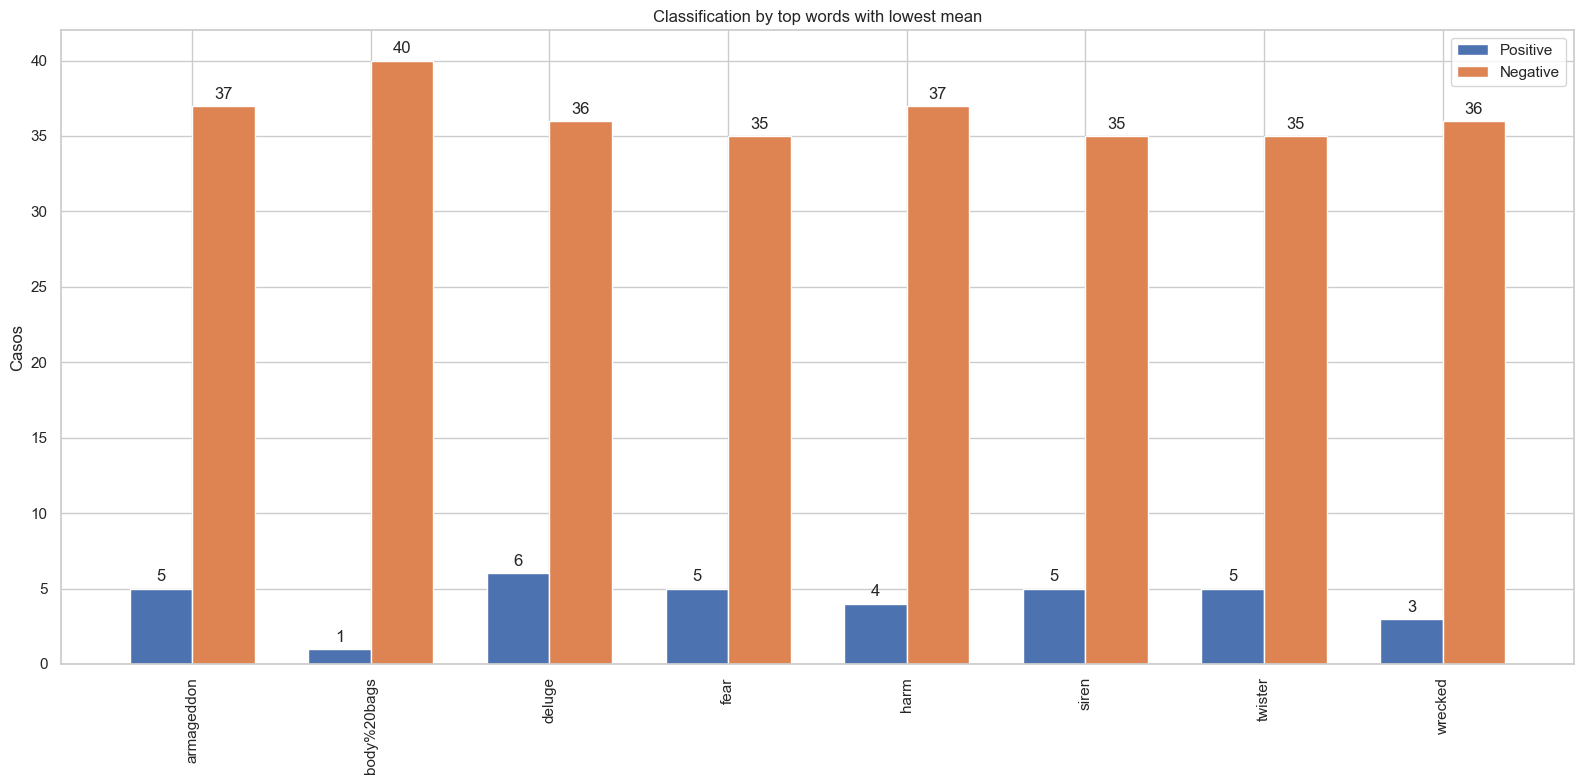

In [545]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = list(top_kw[top_kw['target_mean'] < 0.15]['keyword'])
postive_cases = list(top_kw[top_kw['target_mean'] < 0.15]['target_sum'])
negative_cases = list(top_kw[top_kw['target_mean'] < 0.15]['negative_cases'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width/2, postive_cases, width, label='Positive')
rects2 = ax.bar(x + width/2, negative_cases, width, label='Negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Casos')
ax.set_title('Classification by top words with lowest mean')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Lets analyze the locations

In [550]:
train_df['location'].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [548]:
real_location_counts = real_df['location'].value_counts()
real_location_counts.head(40)

USA                            67
United States                  27
Nigeria                        22
India                          20
Mumbai                         19
UK                             16
London                         16
New York                       16
Washington, DC                 15
Canada                         13
Worldwide                      12
Australia                       9
Washington, D.C.                9
Chicago, IL                     9
Indonesia                       8
Earth                           8
Los Angeles, CA                 8
California, USA                 8
Sacramento, CA                  7
Nashville, TN                   7
California                      7
Toronto                         7
San Francisco, CA               7
New York, NY                    7
Los Angeles                     7
New York City                   6
San Francisco                   6
Ireland                         6
US                              6
Denver, Colora

In [47]:
real_location_frame['location'].mean()

1.4514210178453404

### Lets analyze top of those

In [564]:
train_df['location'].value_counts()

USA                         104
New York                     71
United States                50
London                       45
Canada                       29
                           ... 
Calgary, Alberta, Canada      1
Between Dire and Radiant      1
WORLDWI$E                     1
Annapolis, MD                 1
Nakhon Si Thammarat           1
Name: location, Length: 3341, dtype: int64

### Lets keep those representative with more than 20 ocurrencies

In [569]:
loc_more_than_20 = train_df.groupby("location").filter(lambda x: len(x) >= 20)

In [571]:
top_loc = loc_more_than_20.groupby('location').agg({'target': ['sum','count', 'mean', 'std']})
level0 = top_loc.columns.get_level_values(0)
level1 = top_loc.columns.get_level_values(1)
top_loc.columns = level0 + '_' + level1
top_loc = top_loc.reset_index()
top_loc['negative_cases'] = top_loc['target_count'] - top_loc['target_sum']
top_loc

,location,target_sum,target_count,target_mean,target_std,negative_cases
0,Canada,13,29,0.45,0.51,16
1,India,20,24,0.83,0.38,4
2,Kenya,5,20,0.25,0.44,15
3,London,16,45,0.36,0.48,29
4,"Los Angeles, CA",8,26,0.31,0.47,18
5,Mumbai,19,22,0.86,0.35,3
6,New York,16,71,0.23,0.42,55
7,Nigeria,22,28,0.79,0.42,6
8,UK,16,27,0.59,0.50,11
9,USA,67,104,0.64,0.48,37


In [572]:
top_loc.mean()

target_sum                      20.33
target_count                    38.92
target_mean                      0.55
target_std                       0.45
negative_cases                  18.58
dtype: float64

In [573]:
train_df['location'].value_counts()

USA                         104
New York                     71
United States                50
London                       45
Canada                       29
                           ... 
Calgary, Alberta, Canada      1
Between Dire and Radiant      1
WORLDWI$E                     1
Annapolis, MD                 1
Nakhon Si Thammarat           1
Name: location, Length: 3341, dtype: int64

In [574]:
# lets see mean distrubution

Text(0, 0.5, 'Density')

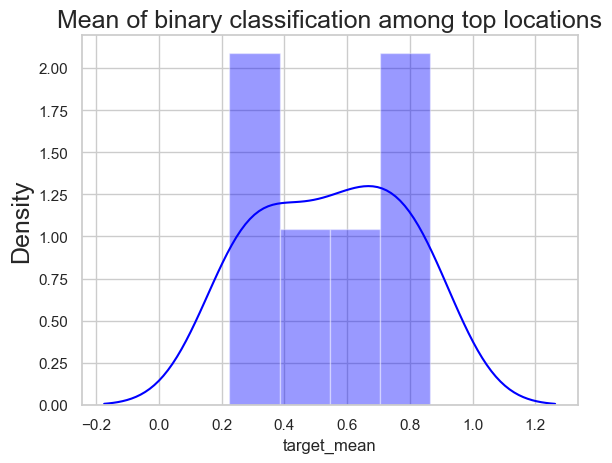

In [575]:
g = sns.distplot(top_loc["target_mean"], color="blue", label='Classification distribution', hist=True, bins=4)
g.set_title("Mean of binary classification among top locations", fontsize=18)
g.set_ylabel("Density", fontsize=18)